# Tensorflow version?

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.3.1'

# Hello Tensorflow!

Youtube의 코드에는 constant로 만든 Node를 tf.session을 통해 실행시켰습니다.   
이는 Tensorflow 버전1이기 때문에 지금 사용하고 있는 버전2에서는 실행되지 않습니다.    
Session이 아니라 하나의 함수로 만들어서 실행시켰습니다. 

In [7]:
# Create a constant op
# This op is added as a node to the default graph
# tf.constant를 통해 하나의 Node를 만들어 준 것.
hello = tf.constant('Hello Tensorflow!')

@tf.function
def printhw() :
    return hello

# run the op and get result
aa = printhw()
print(aa)

tf.Tensor(b'Hello Tensorflow!', shape=(), dtype=string)


# Computational Graph

두개의 노드를 만들어서, 두 노드의 합을 구하는 것을 만들어봅시다.   
"노드만 보면, 결과값이 나오는게 아니라 그냥 노드인것만을 보여줍니다.   
이는 세션을 만들어서 세션을 실행시켜주어야 한다. 이 세션에 실행시키고자 하는 노드를 넣는다."   
강의에는 이렇게 나와있으나, 버전2에서는 노드의 값이 그대로 Print 됩니다.

In [12]:
# 1. build graph
node1 = tf.constant(3.0,tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1,node2)

In [13]:
print('node1 :',node1)
print('node2 :',node2)
print('node3 :',node3)

node1 : tf.Tensor(3.0, shape=(), dtype=float32)
node2 : tf.Tensor(4.0, shape=(), dtype=float32)
node3 : tf.Tensor(7.0, shape=(), dtype=float32)


In [17]:
@tf.function
def node_sum():
    return node1+node2

output = node_sum()
print(output)

tf.Tensor(7.0, shape=(), dtype=float32)


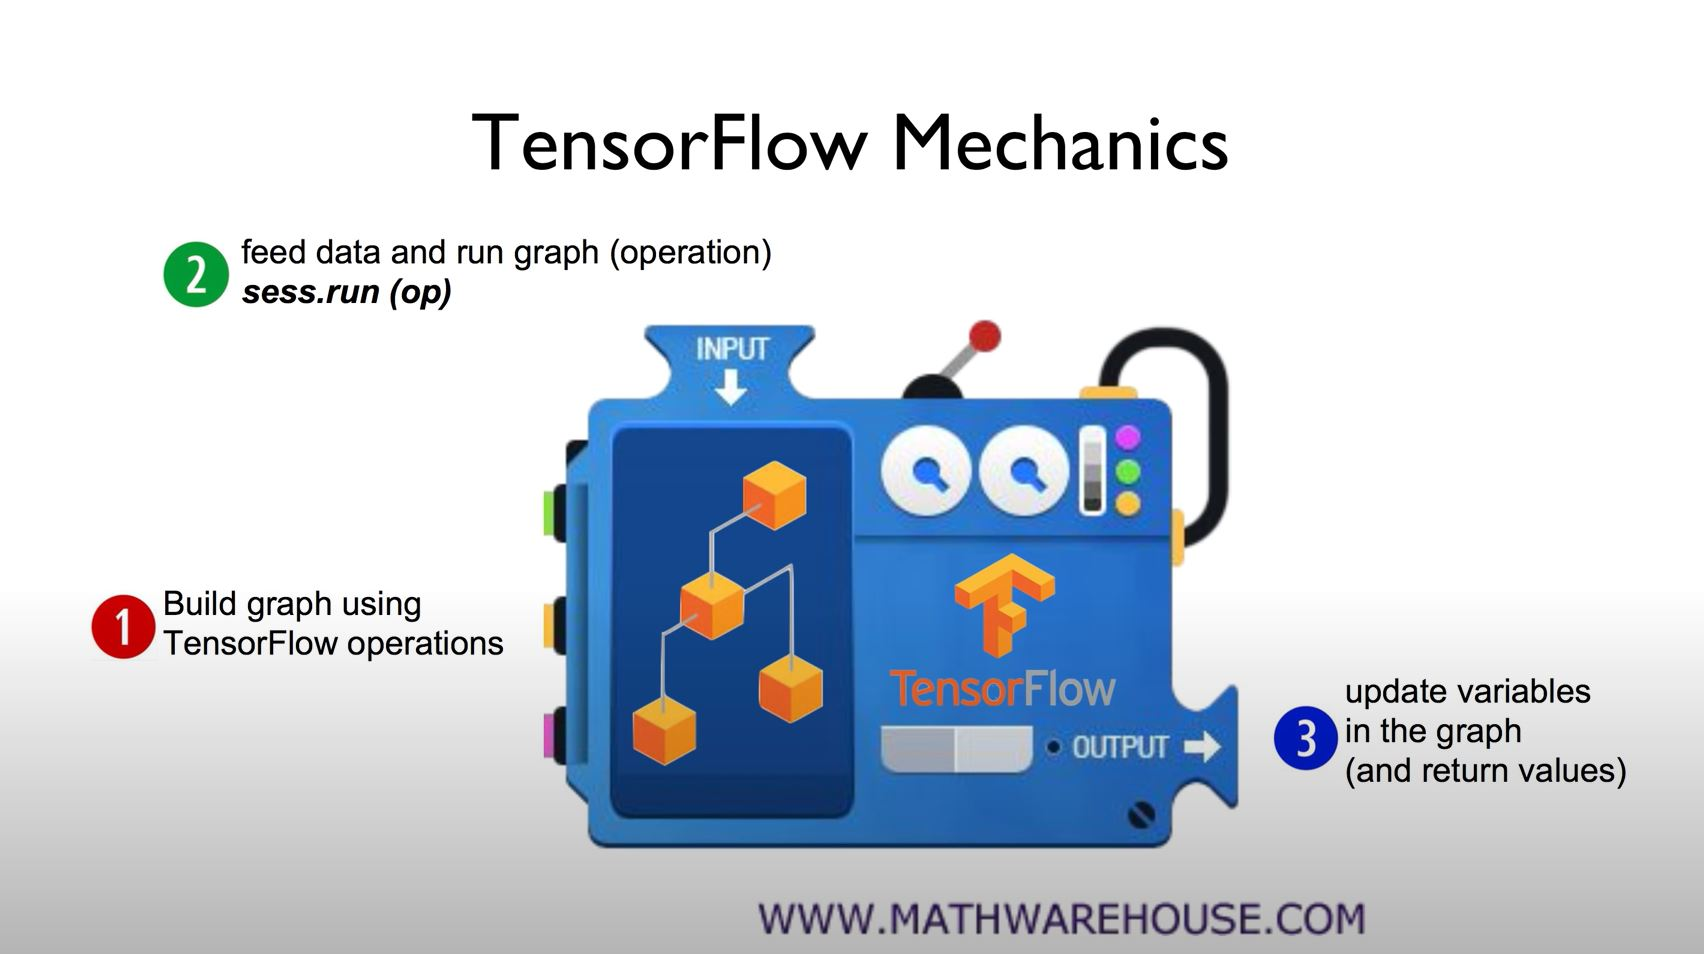

In [21]:
from IPython.display import Image
Image('C:/Users/rsh15/Desktop/tensor.jpg')

기존의 프로그램과는 다르게, Tensorflow는 먼저 그래프를 빌드하고,   
이 그래프를 실행시킴을 통해 값이 Update되거나, 값을 Return하는 방식으로 실행됩니다.   
강의에서는 Tensorflow1을 기준으로 하기 때문에 session을 호출해서 컴파일해야 합니다. 하지만 2로 넘어오면서 그럴 필요가 사라졌습니다.

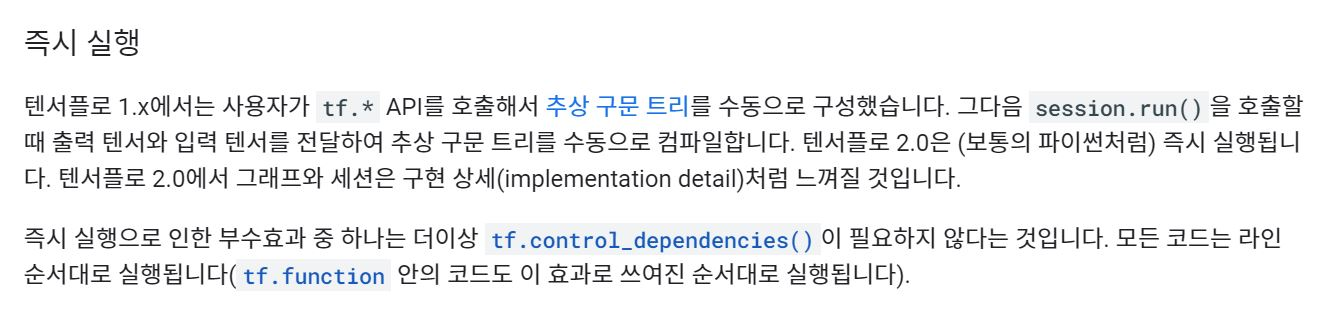

In [22]:
Image('C:/Users/rsh15/Desktop/tensor2.jpg')

Tensorflow 공식 문서의 일부입니다. 버전이 넘어오면서 수동 컴파일 할 필요없이 즉시 실행되는 것에 대한 설명입니다.

# Placeholder

그래프를 그리고 실행하는 방법은 알았는데, 아까처럼 상수가 아니라 빈 그래프를 만들고, 실행할 때 값을 넣어줄수는 없을까요?   
이때는 Node를 Constant가 아니라 Placeholder로 만들어줍니다. - Tensorflow1

하지만 Tensorflow1에서 2로 넘어오면서 Placeholder는 없어졌고, tf.function에 값을 넘겨주는 방식으로 사용할 수 있습니다.

In [43]:
a = tf.Variable(tf.zeros(shape=2),dtype=tf.float32)
b = tf.Variable(tf.zeros(shape=2),dtype=tf.float32)

In [44]:
@tf.function
def add_re(a,b):
    return a+b

In [45]:
print(add_re(3,2))

tf.Tensor(5, shape=(), dtype=int32)


# Tensor Ranks, Shapes and Types

Rank : 몇차원의 Array인가?(Scalar, Vector, Maxtix...)   
Shape : 차원은 알았는데, 각 Element에 몇개씩 들어있나?   
Type : 다양한 Type이 있는데, 보통 int32, float32를 많이 사용합니다.